# Аналитика в авиакомпании 

##### ЗАДАЧИ

1. Изучить информацию о моделях и городах прибытия самолетов;
2. Преобработать данные
3. Проанализировать информацию о количестве рейсов
4. Сделать вывод 

###### 1. ИЗУЧЕНИЕ ИНФОРМАЦИИ

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model=pd.read_csv('query_1.csv')

In [3]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
model.dtypes

model             object
flights_amount     int64
dtype: object

In [5]:
city=pd.read_csv('query_3.csv')

In [6]:
city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [7]:
city.dtypes

city                object
average_flights    float64
dtype: object

In [8]:
city.nunique()

city               101
average_flights     60
dtype: int64

In [9]:
city['city'].value_counts()

Белоярский         1
Санкт-Петербург    1
Архангельск        1
Воркута            1
Томск              1
                  ..
Удачный            1
Волгоград          1
Нарьян-Мар         1
Сочи               1
Пенза              1
Name: city, Length: 101, dtype: int64

In [10]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


#### ВЫВОД

Представлена информация о рейсах 8 моделей самолетов в 101 город. В данных нет пропущенной информации и все данные соответсвующих типов. Т.е преобработка данных не требуется. Приступим к анализу данных.

### 2. Анализ данных

Text(0.5, 1.0, 'РАНЖИРОВАНИЕ КОЛИЧЕСТВА РЕЙСОВ У РАЗНЫХ МОДЕЛЕЙ САМОЛЕТА')

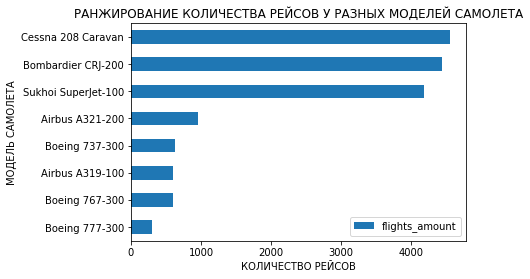

In [14]:
# посмотрим график распределения количества рейсов среди самолотов разных моделей
model.sort_values('flights_amount').plot(x='model',kind='barh')
plt.xlabel('КОЛИЧЕСТВО РЕЙСОВ') 
plt.ylabel('МОДЕЛЬ САМОЛЕТА') 
plt.title('РАНЖИРОВАНИЕ КОЛИЧЕСТВА РЕЙСОВ У РАЗНЫХ МОДЕЛЕЙ САМОЛЕТА')     

Три лидирующие модели: Cessna, Bombardier и Sukhoi. Меньше всего рейсов у Boeing 777

Text(0.5, 1.0, 'РАНЖИРОВАНИЕ КОЛИЧЕСТВА РЕЙСОВ РАЗНЫХ ГОРОДОВ')

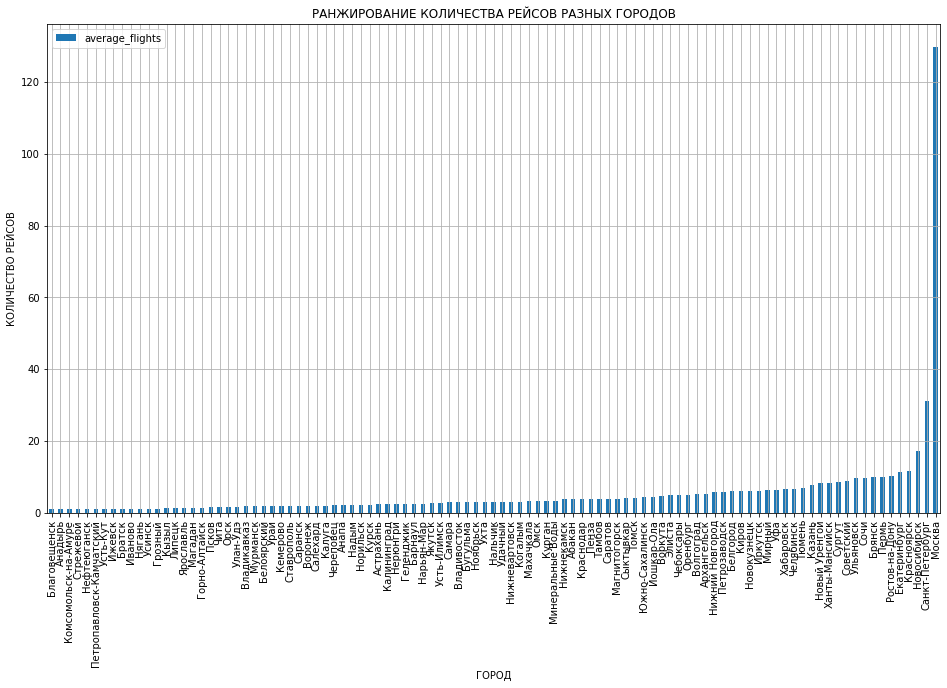

In [17]:
# Посмотрим распределение количества рейсов среди городов
city.sort_values('average_flights').plot(x='city',kind='bar',figsize=(16,9), grid=True)
plt.xlabel('ГОРОД') 
plt.ylabel('КОЛИЧЕСТВО РЕЙСОВ') 
plt.title('РАНЖИРОВАНИЕ КОЛИЧЕСТВА РЕЙСОВ РАЗНЫХ ГОРОДОВ')  

Больше всего рейсов в Москву.

In [18]:
# расчитаем долю рейсов которая приходится на каждый город; для этого сначала узнаем общее значение
avr_flight_sum=city['average_flights'].sum()

In [19]:
city['flight_part']=city['average_flights']/avr_flight_sum

In [20]:
# 10 городов с наибольшим количеством рейсов
top_city=city.sort_values('average_flights',ascending=False).head(10)

In [21]:
top_city

,city,average_flights,flight_part
43,Москва,129.774194,0.233864
70,Санкт-Петербург,31.161290,0.056155
54,Новосибирск,17.322581,0.031217
33,Красноярск,11.580645,0.020869
20,Екатеринбург,11.322581,0.020404
67,Ростов-на-Дону,10.193548,0.018370
63,Пермь,10.129032,0.018253
10,Брянск,10.000000,0.018021
74,Сочи,9.612903,0.017323
84,Ульяновск,9.580645,0.017265


В основном рейсы в Москву (23%), далее Санкт-Петербург (5.6%), Новосибирск (3.1%). Замыкает топ городов-лидиров Ульяновск (1.7%)

Text(0.5, 1.0, 'РАНЖИРОВАНИЕ КОЛИЧЕСТВА РЕЙСОВ ГОРОДОВ ТОП 10')

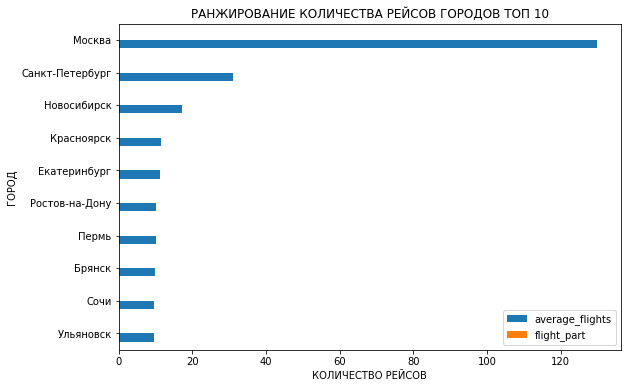

In [22]:
# посториим график 10 городов с наибольшим количеством рейсов
top_city.sort_values('average_flights').plot(x='city',kind='barh',figsize=(9,6))
plt.xlabel('КОЛИЧЕСТВО РЕЙСОВ') 
plt.ylabel('ГОРОД') 
plt.title('РАНЖИРОВАНИЕ КОЛИЧЕСТВА РЕЙСОВ ГОРОДОВ ТОП 10')  

### 3. ВЫВОД

Для анализа данных представлена информация о рейсах 8 моделей самодетов в 101 город. Данные не требуют преобработки данных (нет пропусков, данные приведены к нужному тпипу)
В сентябре 2018 года больше всего рейсов было у Cessna 208, менее всего у Boeing 777-300. Среднее количество рейсов за день августа 2018 года было больше всего в Москву. Топ-10 городов по количеству рейсов: 1.Москва, 2.Санкт-Петербург, 3. Новосибирск, 4.Красноярск, 5. Екаринбург, 6. Ростов-на-Дону, 7.Пермь, 8.Брянск, 9. Сочи, 10.Ульяновск